In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
# nltk.download()

In [3]:
df = pd.read_csv('/content/review.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
print(df.shape)

(7989, 10)


In [7]:
df=df.head(1000)

In [8]:
print(df.shape)

(1000, 10)


Text(0, 0.5, 'Customer count ')

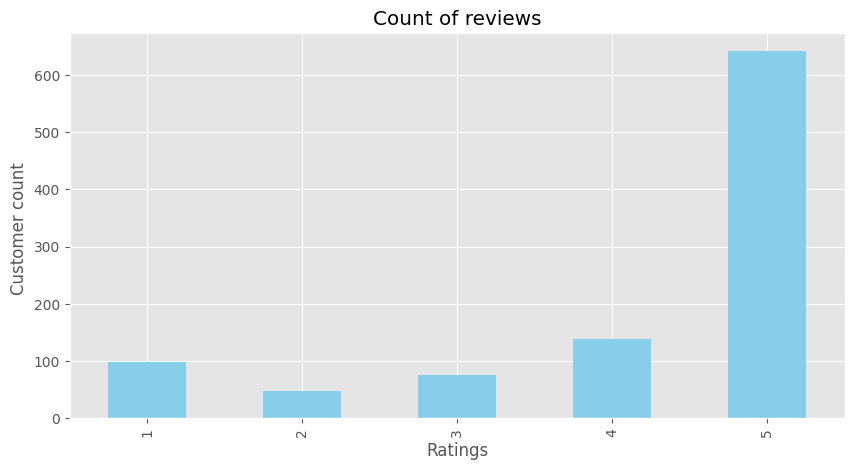

In [9]:
ax=df['Score'].value_counts().sort_index()\
.plot(kind='bar',
      title='Count of reviews',
      figsize=(10,5),
      color='skyblue'   )
ax.set_xlabel('Ratings')
ax.set_ylabel('Customer count ')

In [10]:
example = df['Text'][40]
print(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'variety', 'packs', 'taste', 'great', '!', '<', 'br', '/', '>']

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('variety', 'NN'),
 ('packs', 'VBZ'),
 ('taste', 'NN'),
 ('great', 'JJ'),
 ('!', '.'),
 ('<', 'JJ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('<', 'NNP'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('them', 'PRP'),
 ('every', 'DT'),
 ('morning', 'NN'),
 ('.', '.'),
 ('At', 'IN'),
 ('$', '$'),
 ('0.30', 'CD'),
 ('cents', 'NNS'),
 ('per', 'IN'),
 ('meal', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('understand', 'VB'),
 ('why', 'WRB'),
 ('everyone', 'NN'),
 ('on', 'IN'),
 ('earth', 'NN'),
 ('is', 'VBZ'),
 ("n't", 'RB'),
 ('buying', 'VBG'),
 ('this', 'DT'),
 ('stuff', 'NN'),
 ('up.', 'JJ'),
 ('<', 'NNP'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('<', 'NNP'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('Maple', 'NNP'),
 ('and', 'CC'),
 ('brown', 'JJ'),
 ('sugar', 'NN'),
 ('is', 'VBZ'),
 ('terrific', 'JJ'),
 (',', ','),
 ('followed', 'VBN'),
 ('by', 'IN'),
 ('apples', 'NNS'),
 ('and', 'CC'),
 ('cinna

In [23]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('variety', 'NN'),
 ('packs', 'VBZ'),
 ('taste', 'NN'),
 ('great', 'JJ'),
 ('!', '.'),
 ('<', 'JJ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP')]

In [27]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [28]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  variety/NN
  packs/VBZ
  taste/NN
  great/JJ
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  them/PRP
  every/DT
  morning/NN
  ./.
  At/IN
  $/$
  0.30/CD
  cents/NNS
  per/IN
  meal/NN
  ,/,
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  everyone/NN
  on/IN
  earth/NN
  is/VBZ
  n't/RB
  buying/VBG
  this/DT
  stuff/NN
  up./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Maple/NNP
  and/CC
  brown/JJ
  sugar/NN
  is/VBZ
  terrific/JJ
  ,/,
  followed/VBN
  by/IN
  apples/NNS
  and/CC
  cinnamon/NN
  ,/,
  followed/VBN
  by/IN
  regular/JJ
  ./.
  You/PRP
  do/VBP
  n't/RB
  get/VB
  tired/VBN
  of/IN
  the/DT
  same/JJ
  ole/JJ
  thing/NN
  ,/,
  and/CC
  they/PRP
  taste/VBP
  great./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  just/RB
  boil/VBP
  water/NN
  from/IN
  a/DT
  small/JJ
  pot/NN
  ,/,
  empty/VBP
  the/DT
  packet/NN
  or/CC
  2/CD
  in/IN
  a/DT
  bowl/

VADER sentiment analysis

- Takes all the words in sentence and labels it either positive, negative or neutral.
- Removes stop words


In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

s = SentimentIntensityAnalyzer()

In [32]:
s

In [33]:
s.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [34]:
s.polarity_scores('This is bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [35]:
s.polarity_scores(example)

{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [36]:
#dictionary
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid]=s.polarity_scores(text)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
# pd.DataFrame(res)
#transpose
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})

In [38]:
vaders=vaders.merge(df,how='left')


In [39]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


Text(0.5, 1.0, 'Compound Score by Amazon Star Reviews')

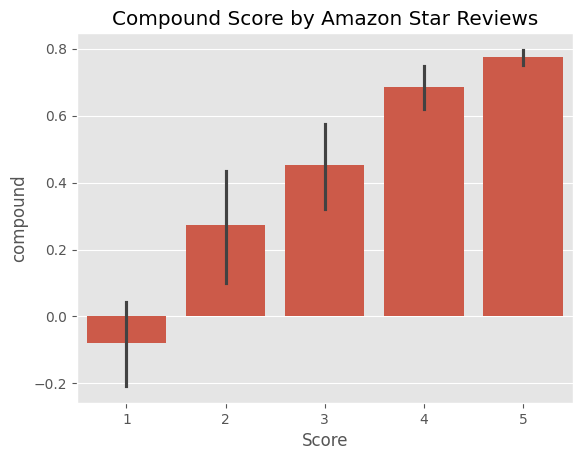

In [40]:
ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Reviews')
# plt.show()

<Axes: xlabel='Score', ylabel='pos'>

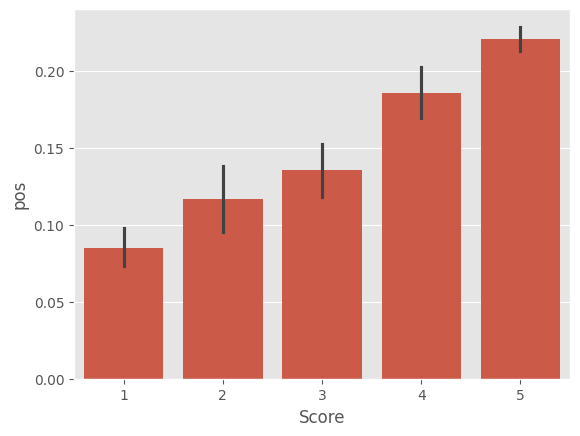

In [41]:
sns.barplot(data=vaders, x='Score', y='pos')

<Axes: xlabel='Score', ylabel='neg'>

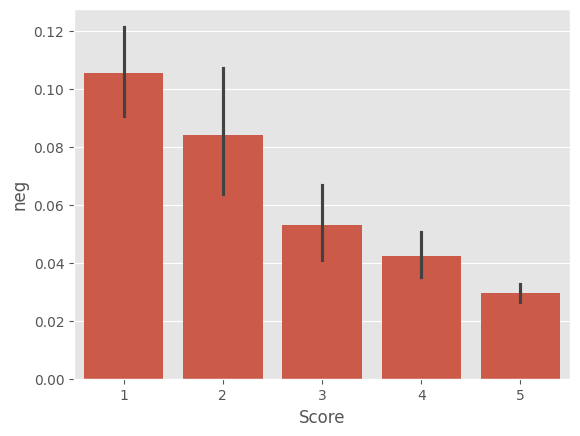

In [42]:
sns.barplot(data=vaders, x='Score', y='neg')

<Axes: xlabel='Score', ylabel='neu'>

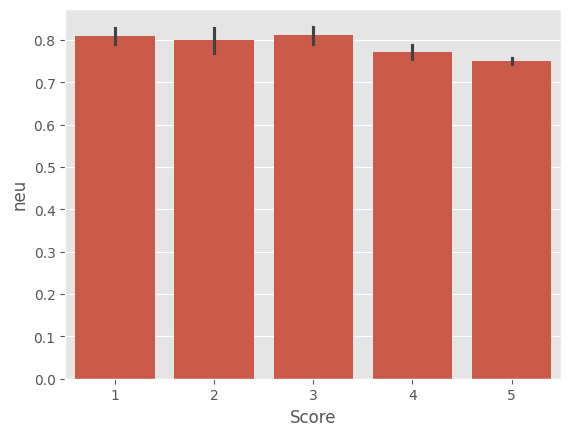

In [43]:
sns.barplot(data=vaders, x='Score', y='neu')

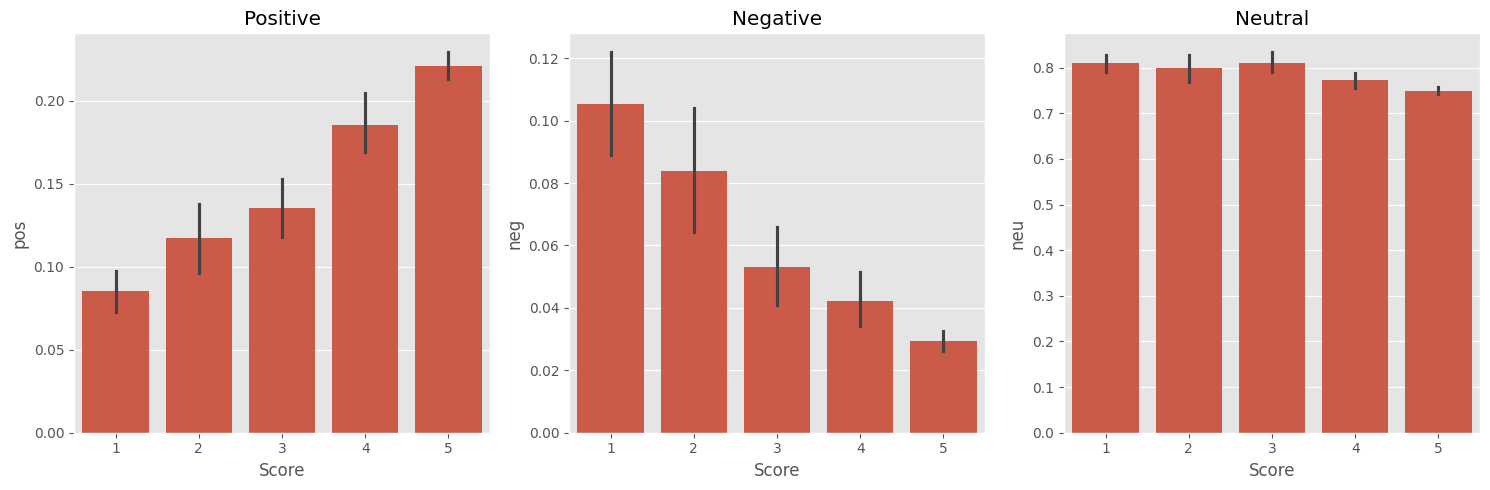

In [44]:
fig, axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

Roberta Pretrained Model


In [45]:
pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00


In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [49]:
#vader results
print(example)
s.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [56]:
#run on roberta model
encoded_txt = tokenizer(example, return_tensors='pt')

In [62]:
output = model(**encoded_txt)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0096905595, 'roberta_neu': 0.0378332, 'roberta_pos': 0.95247626}


In [63]:
def polarity_scores_roberta(example):
  output = model(**encoded_txt)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [78]:
#dictionary
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_res = s.polarity_scores(text)
    roberta_res = polarity_scores_roberta(text)
    both = {**vader_res, **roberta_res}
    break

  0%|          | 0/1000 [00:00<?, ?it/s]

In [79]:
both

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.0096905595,
 'roberta_neu': 0.0378332,
 'roberta_pos': 0.95247626}

In [100]:
#dictionary
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_res = s.polarity_scores(text)
    vader_res_rename = {}
    for key, value in vader_res.items():
      vader_res_rename[f"vader_{key}"] = value
    roberta_res = polarity_scores_roberta(text)
    both = {**vader_res_rename, **roberta_res}
    res[myid]=both

  0%|          | 0/1000 [00:00<?, ?it/s]

In [101]:
both

{'vader_neg': 0.027,
 'vader_neu': 0.939,
 'vader_pos': 0.034,
 'vader_compound': -0.1027,
 'roberta_neg': 0.0096905595,
 'roberta_neu': 0.0378332,
 'roberta_pos': 0.95247626}

In [102]:
res_df = pd.DataFrame(res).T
res_df = res_df.reset_index().rename(columns={'index':'Id'})
res_df = res_df.merge(df,how='left')

In [103]:
res_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009691,0.037833,0.952476,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.009691,0.037833,0.952476,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.009691,0.037833,0.952476,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.009691,0.037833,0.952476,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.009691,0.037833,0.952476,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,0.009691,0.037833,0.952476,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,0.009691,0.037833,0.952476,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,0.009691,0.037833,0.952476,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,0.009691,0.037833,0.952476,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [104]:
res_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009691,0.037833,0.952476,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.009691,0.037833,0.952476,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.009691,0.037833,0.952476,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.009691,0.037833,0.952476,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.009691,0.037833,0.952476,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [105]:
res_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Compare Scores between vader and roberta models


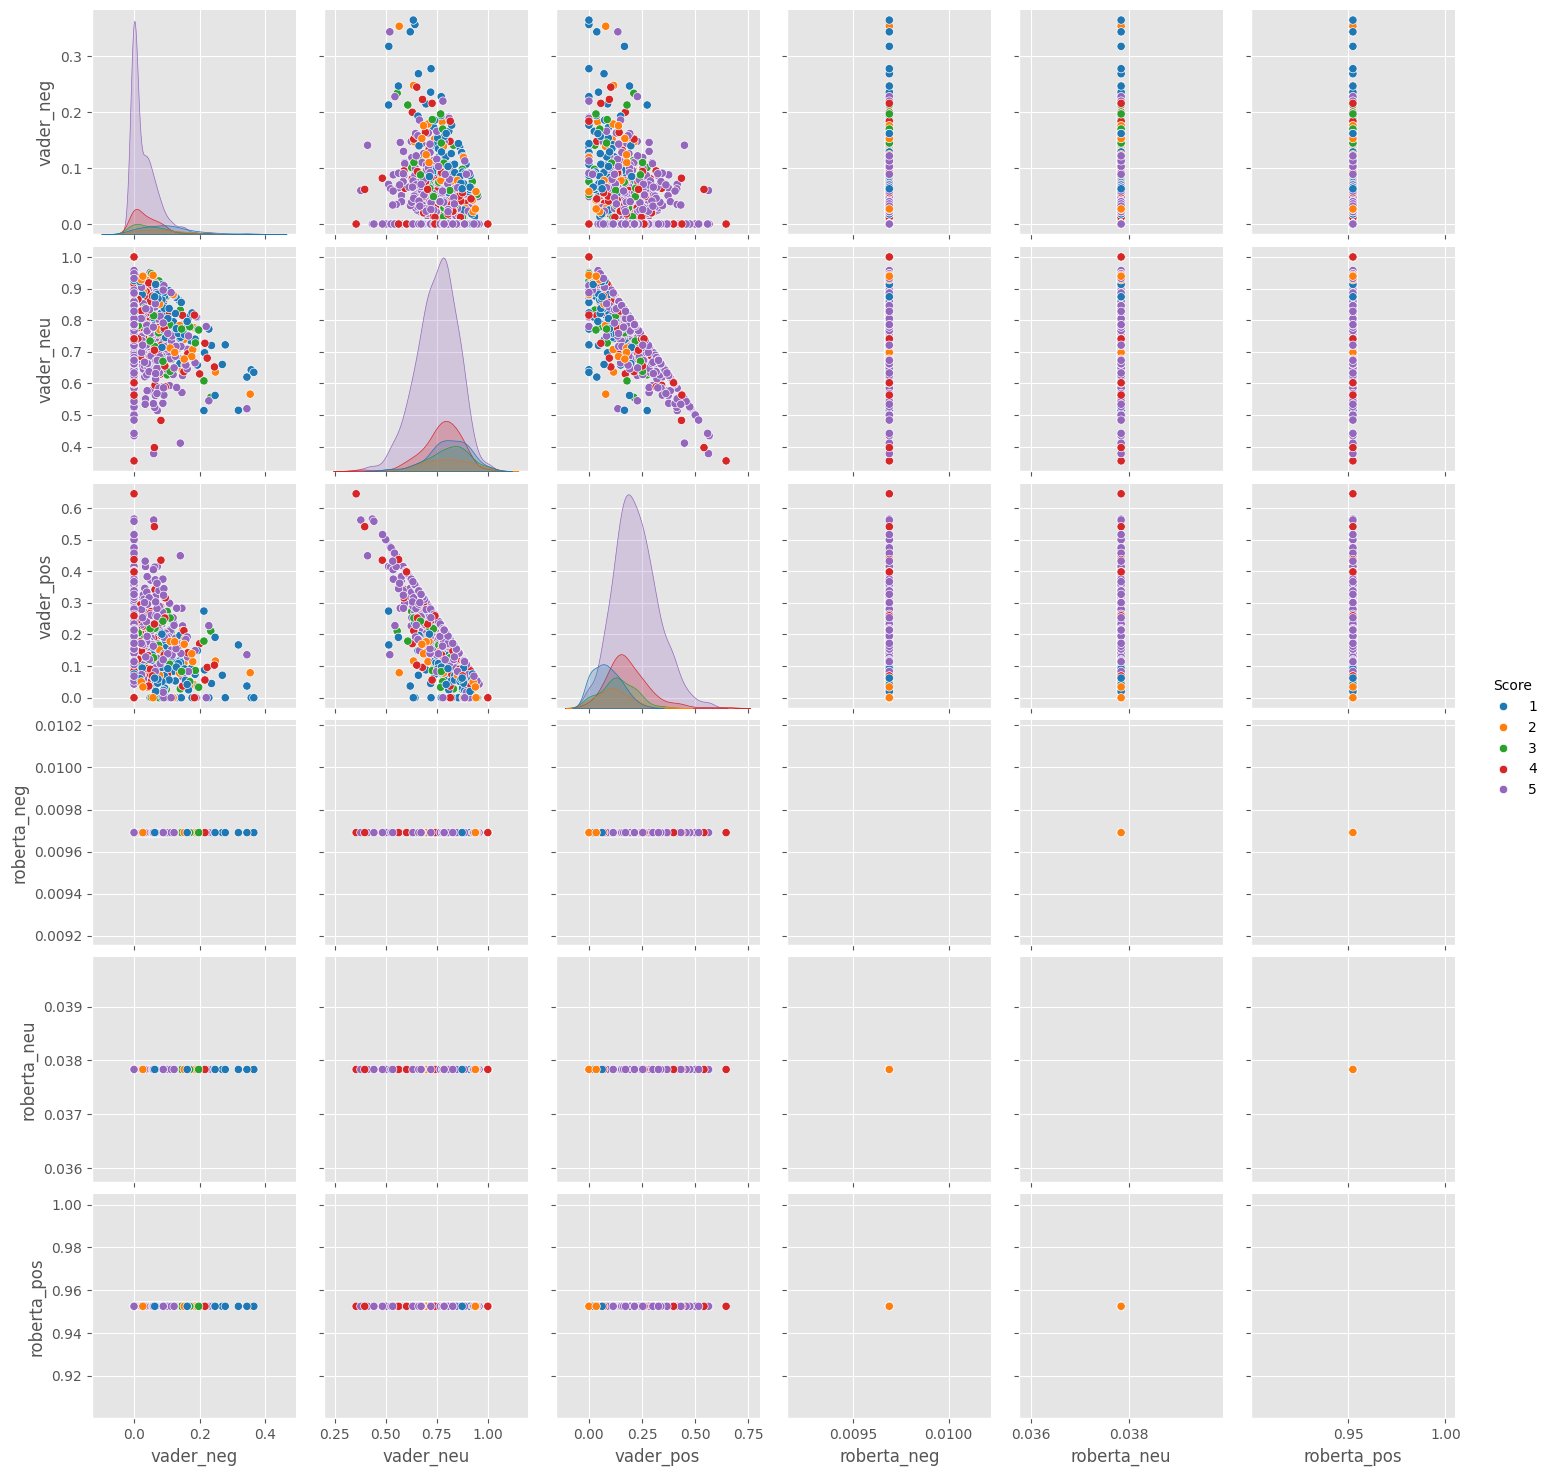

In [108]:
sns.pairplot(data=res_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

Review some examples
- to check how model decides the sentiment
- let's also observe the wrong assumptions of the model

In [110]:
res_df.query('Score==1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [116]:
res_df.query('Score==5').sort_values('roberta_pos', ascending=False)['Text'].values[6]

'This sweetner is the best, it brings out the true flavors in what ever you add it to. And it has great health benefts.'

Transformers Pipeline

In [118]:
from transformers import pipeline
s_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [122]:
s_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]